In [1]:
import numpy as np
import numpy.random as random
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy as sp

import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
%matplotlib inline
%precision 3



pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
import requests,zipfile
import io

zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'
r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

bank = pd.read_csv('bank-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


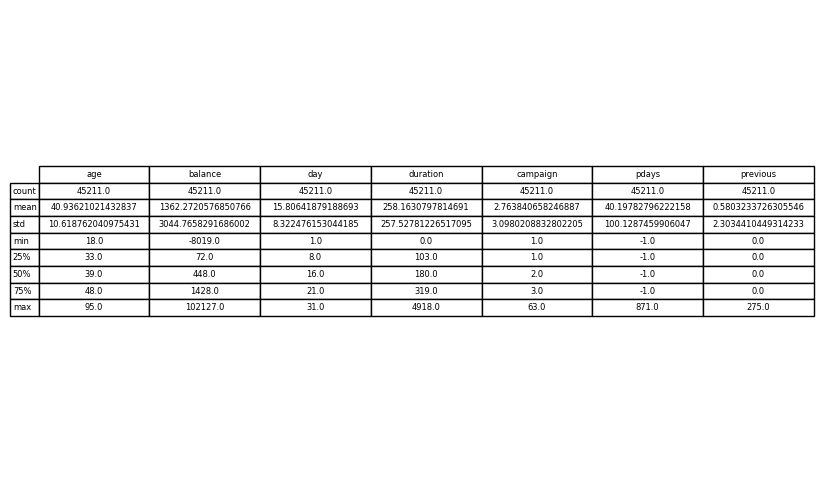

In [3]:
# 'bank' DataFrameのdescribe()メソッドを使用
describe_output = bank.describe()

# 描画準備
fig, ax = plt.subplots(figsize=(10, 6))  # 画像のサイズを調整

# describe()の結果をテーブルとしてプロット
ax.axis('off')  # 軸を非表示
ax.table(cellText=describe_output.values,
        colLabels=describe_output.columns,
        rowLabels=describe_output.index,
        cellLoc='center',
        loc='center')

# 画像として保存
plt.savefig(r"C:\Users\sk062\OneDrive\デスクトップ\describe.png", bbox_inches="tight")


In [5]:
bank.isnull().sum().sum()

0

In [6]:
bank_int= bank.select_dtypes(include=int)
bank_int.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [7]:
# 'bank_int' DataFrameの相関行列を計算
corr_output = bank_int.corr()

# 相関行列をヒートマップで可視化
plt.figure(figsize=(10, 8))  # 画像サイズを調整
sns.heatmap(corr_output, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# 画像として保存
plt.savefig(r"C:\Users\sk062\OneDrive\デスクトップ\corr.png", bbox_inches='tight')
plt.close()  # プロットを閉じてメモリを解放

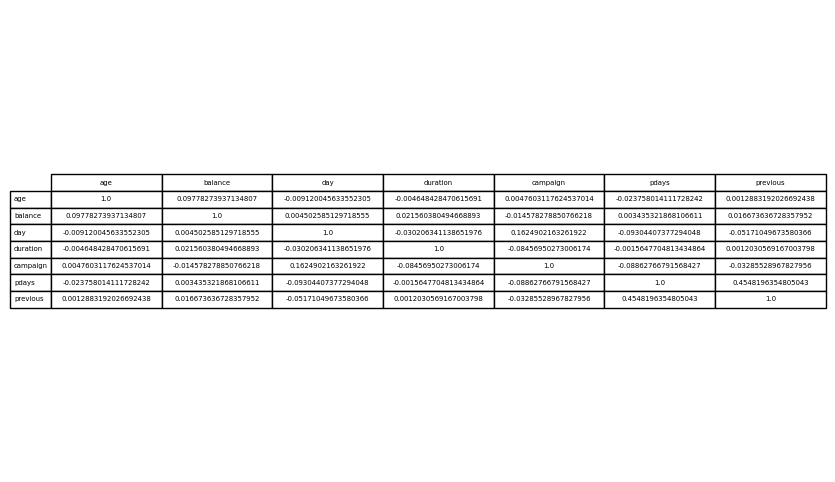

In [8]:
import matplotlib.pyplot as plt

# 'bank_int' DataFrameの相関行列を計算
corr_output = bank_int.corr()

# 描画準備
fig, ax = plt.subplots(figsize=(10, 6))  # 画像サイズを調整

# 相関行列をテーブルとしてプロット
ax.axis('off')  # 軸を非表示
ax.table(cellText=corr_output.values,
        colLabels=corr_output.columns,
        rowLabels=corr_output.index,
        cellLoc='center',
        loc='center')

# 画像として保存
plt.savefig(r"C:\Users\sk062\OneDrive\デスクトップ\corr_matrix.png", bbox_inches="tight")


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'bank_int' DataFrameの相関行列を計算
bank_int_corr = bank_int.corr()

# 相関行列のペアプロットを作成
sns.pairplot(bank_int_corr)

# 画像として保存
plt.savefig(r"C:\Users\sk062\OneDrive\デスクトップ\scatter.png", bbox_inches='tight')
plt.close()  # プロットを閉じてメモリを解放
